In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Education/Wage Data Set
train = pd.read_csv('Effect on Education')
train

Wage  AFQT  Educ  Exper  Age  Meduc   Logwage
0     950    96    12     14   35      8  6.856462
1     797    90    16     11   33     14  6.680855
2     873    95    12     14   38     10  6.771935
3    1575   117    12     13   30     10  7.362010
4     654   121    17     12   34     11  6.483108
..    ...   ...   ...    ...  ...    ...       ...
436  1313   107    12     11   28     12  7.180070
437  1105   119    16      9   30     11  7.007601
438  1386   109    16     10   34      4  7.234177
439  1063    90    12     14   32      8  6.968851
440  1000    93    11     16   34     12  6.907755

[441 rows x 7 columns]

## EDA
Looking for significant variables

In [3]:
corr = train.corrwith(train.Wage).sort_values(ascending=False)
print(corr)

#Here we observe relatively low linear correlations with Wage- lets look at correlation with logWage

Wage       1.000000
Logwage    0.962567
Educ       0.358501
AFQT       0.314097
Meduc      0.231794
Age        0.199520
Exper     -0.011772
dtype: float64


In [4]:
logcorr = train.corrwith(train.Logwage).sort_values(ascending=False)
print(logcorr)

#Comprable correlation results- (may suggest low levels of Heteroskedasticity in error terms)

Logwage    1.000000
Wage       0.962567
Educ       0.340705
AFQT       0.332200
Meduc      0.231436
Age        0.198504
Exper      0.014048
dtype: float64


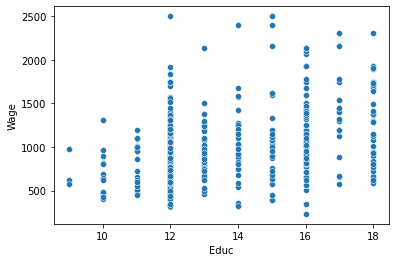

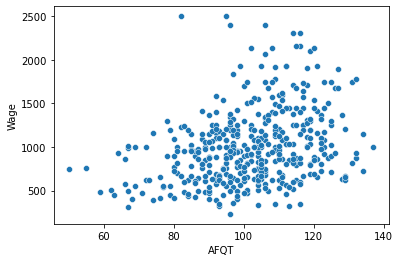

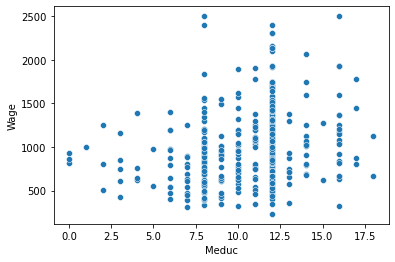

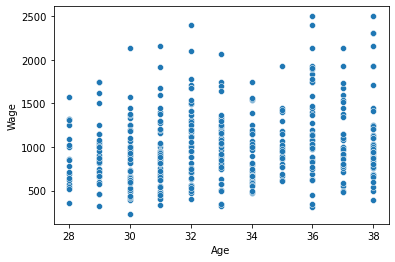

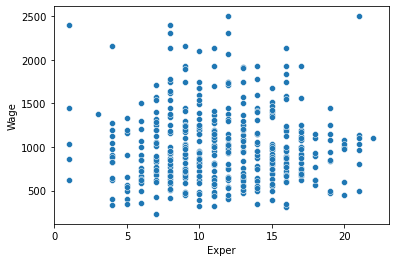

In [5]:
#Now, look for patterns in individual predictor scatterplots
sns.scatterplot(x=train.Educ, y=train.Wage)
plt.show()

sns.scatterplot(x=train.AFQT, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Meduc, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Age, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Exper, y=train.Wage)
plt.show()

Observationally, we see a distinct non-linear relationship in the AFQT plot.

Less clearly, there appears to be some non-linearity in the Meduc  and Educ plots.

**Further EDA**

## Model
Naive model based on EDA results. Include visualizations

In [7]:
#Feel free to change this, wanted to get my EDA observations in a model
model = sm.ols(formula='Wage~I(AFQT**2)+Educ+Exper+Age+Meduc', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     21.24
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           5.04e-19
Time:                        17:38:00   Log-Likelihood:                -3238.0
No. Observations:                 441   AIC:                             6488.
Df Residuals:                     435   BIC:                             6513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -818.9319    222.821     -3.675      0.000   -1256.872    -380.992
I(AFQT ** 2)     0.0215      0.007      2.933      0.004       0.007       0.036
Educ            53.0126     11.246      4.714      0.000      30.909      75.116
Exper           11.1174      5.749      1.934      0.054      -0.181      22.416
Age             18.0974      7.148      2.532      0.012       4.048      32.147
Meduc           13.2478      6.729      1.969      0.050       0.023      26.472
==============================================================================
Omnibus:                       59.450   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.394
Skew:                           0.849   Prob(JB):                     3.18e-21
Kurtosis:                       4.501   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Very low $R^2$ value. Intercept term does not make sense in the context of our problem- as our predictors have little meaning as they approach zero. Let us force the regression through 0 by removing the intercept term.

In [8]:
model = sm.ols(formula='Wage~I(AFQT**2)+Educ+Exper+Age+Meduc-1', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              626.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                   1.99e-196
Time:                        17:38:02   Log-Likelihood:                         -3244.8
No. Observations:                 441   AIC:                                      6500.
Df Residuals:                     436   BIC:                                      6520.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I(AFQT ** 2)     0.0204      0.007      2.753      0.006       0.006       0.035
Educ            41.8205     10.980      3.809      0.000      20.240      63.401
Exper           10.4273      5.827      1.789      0.074      -1.026      21.880
Age             -0.2805      5.181     -0.054      0.957     -10.463       9.902
Meduc           10.0936      6.769      1.491      0.137      -3.210      23.397
==============================================================================
Omnibus:                       71.588   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.361
Skew:                           0.976   Prob(JB):                     1.21e-26
Kurtosis:                       4.640   Cond. No.                     7.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis
Check metrics/metrics for overfitting and assumption fulfillment

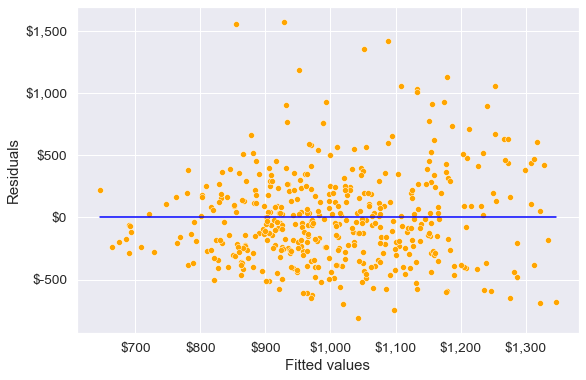

In [9]:
pred_wage = model.predict(train)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

The model seems to satisfy the non-linearity assumption, as we do not observe a strong pattern in the residuals around the line Residuals = 0. Residuals are distributed more or less in a similar manner on both sides of the blue line for all fitted values. We observe that the constant variance assumption is also satisfied. 

In [11]:
out = model.outlier_test()
np.sum((np.abs(out.student_resid)>3))

5

0

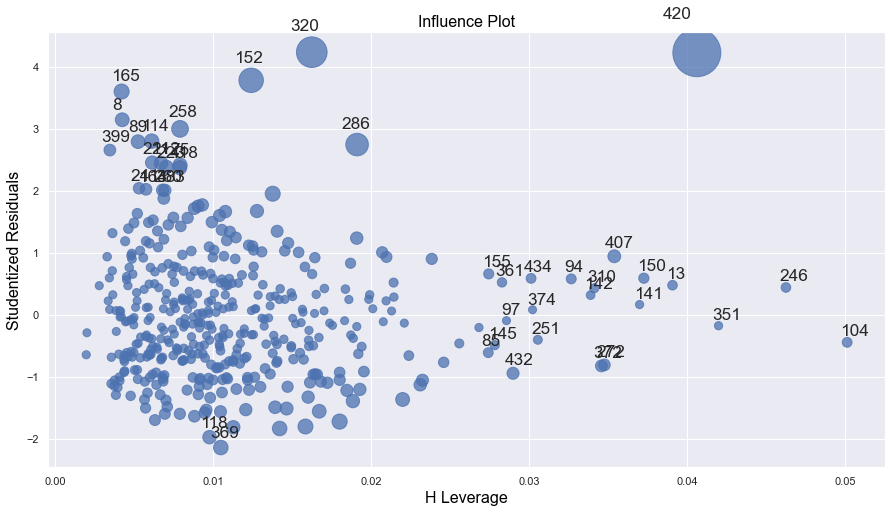

In [15]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag

sns.set(rc={'figure.figsize':(15,8)})
sm.graphics.influence_plot(model);
out = model.outlier_test()
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

In [16]:
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))
train.shape[0]-train_filtered.shape[0]

0

## Optimization 
Interaction terms, Transformations, Outliers, Colinearity, etc.

<AxesSubplot:>

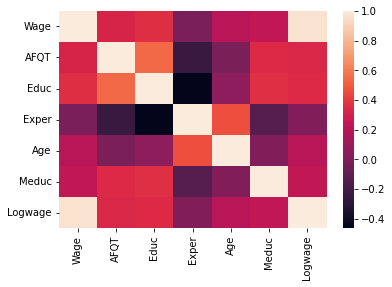

In [20]:
#Colinearity analysis
sns.heatmap(train.corr())

We see high correlations (>0.5) between: 
- Educ and AFQT
- Exper and Age

## Updated Model and Analysis
Report Metrics and assumption status of current model. Output results.